# Task 03

In [13]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [14]:
file_path = (r"C:\Users\Lenovo\Downloads\bank+marketing\bank\bank-full.csv")
bank_df = pd.read_csv(file_path, sep=';')

In [15]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [16]:
le = LabelEncoder()
categorical_cols = bank_df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    bank_df[col] = le.fit_transform(bank_df[col])

In [17]:
X = bank_df.drop(columns=['y'])  
y = bank_df['y']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [20]:
y_pred = dt_model.predict(X_test)

In [22]:
accuracy_score(y_test, y_pred)
classification_report(y_test, y_pred)
confusion_matrix(y_test, y_pred)

array([[7378,  574],
       [ 565,  526]], dtype=int64)

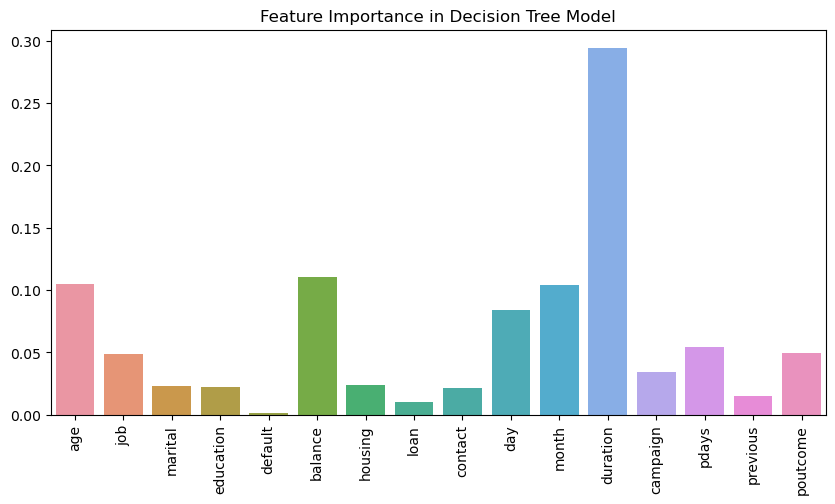

In [23]:
plt.figure(figsize=(10,5))
sb.barplot(x=X.columns, y=dt_model.feature_importances_)
plt.xticks(rotation=90)
plt.title("Feature Importance in Decision Tree Model")
plt.show()
